In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# ✅ Load the processed dataset
file_path = "Transformed_Cancer_Incidence.csv"
data = pd.read_csv(file_path)


In [5]:
# ✅ Feature Selection for Regression & Classification
features = ['Year', 'Incidence', 'Rolling_Avg_Incidence', 'Lag_Incidence', 'Growth_Rate', 'Cumulative_Incidence']
data = data.dropna()
X = data[features]
y = data['Incidence']  # Target variable for regression


In [6]:
# ✅ Train-Test Split for Regression & Classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 🔹 REGRESSION: Predicting Future Mortality (XGBoost)
xgb_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train, y_train)
future_predictions = xgb_regressor.predict(X_test)


In [9]:
# 🔹 CLASSIFICATION: High-Risk Zone Detection (Logistic Regression)
data['High_Risk'] = (data['Incidence'] > data['Incidence'].quantile(0.75)).astype(int)  # Top 25% deaths are high-risk
clf = LogisticRegression()
clf.fit(X_train, data.loc[X_train.index, 'High_Risk'])
classification_preds = clf.predict(X_test)

In [10]:
# 🔹 CLUSTERING: Identifying Similar Mortality Patterns (K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)


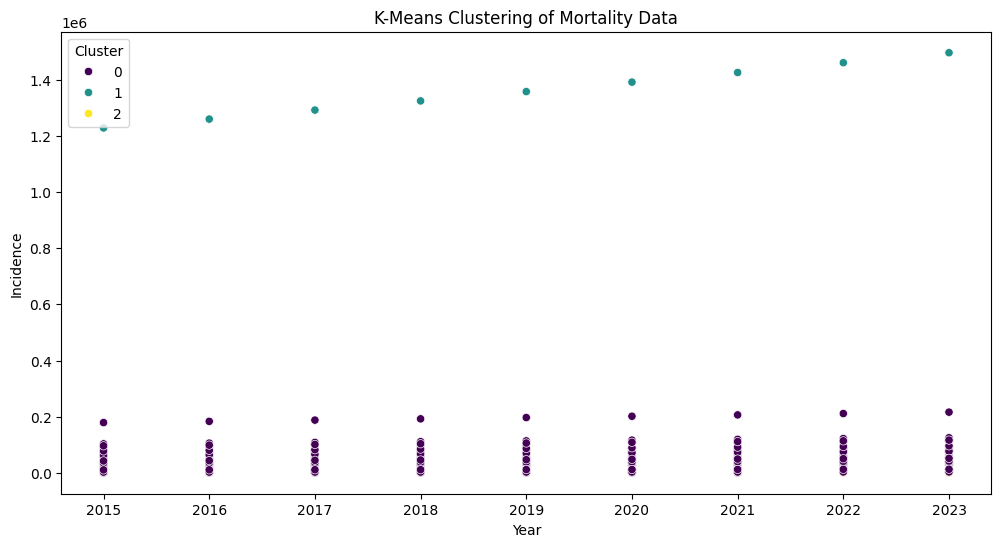

In [13]:
# ✅ Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['Year'], y=data['Incidence'], hue=data['Cluster'], palette='viridis')
plt.title('K-Means Clustering of Mortality Data')
plt.xlabel('Year')
plt.ylabel('Incidence')
plt.legend(title='Cluster')
plt.show()


In [14]:
print("Future Predictions (XGBoost):", future_predictions[:5])
print("Classification Predictions (Logistic Regression):", classification_preds[:5])
print("Cluster Assignments (K-Means):", data[['region', 'Cluster']].head())


Future Predictions (XGBoost): [  535.209     295.87808 25856.97     1081.8594  28564.904  ]
Classification Predictions (Logistic Regression): [0 0 0 0 0]
Cluster Assignments (K-Means):                       region  Cluster
1  Andaman & Nicobar Islands        0
2  Andaman & Nicobar Islands        0
3  Andaman & Nicobar Islands        0
4  Andaman & Nicobar Islands        0
5  Andaman & Nicobar Islands        0
